In [5]:
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

# Load Data

In [6]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split("D:\\Dropbox\\My work\\krypl-project\\dataSplit\\return-01-loss-max-01-within-day")

# Test Train Validation Split

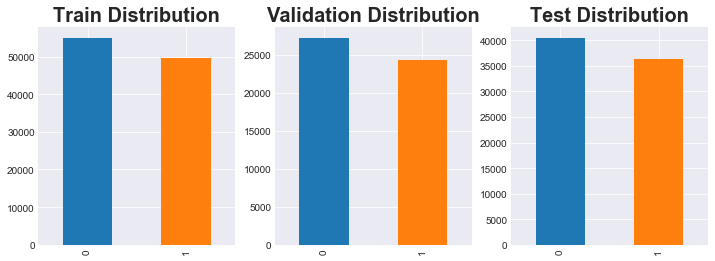

In [7]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font);

In [8]:
X_train.describe()

,return,return_1,return_2,zscore_36_return,zscore_288_return,zscore_36_volume,zscore_288_volume,zscore_2016_volume,pma36,pma288,...,vma2016,ma_12_108,ma_36_288,ac36,ac288,vol36,vol288,vol2016,dv_36_288,dv_288_2016
count,"104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000",...,"104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000","104,716.0000"
mean,0.0000,0.0000,0.0000,"7,324.7566",-0.0039,115.9804,0.0668,0.0541,-0.0070,-0.0110,...,0.0546,-0.0062,-0.0111,-0.0037,0.0164,0.1091,-0.0423,-0.0030,0.1296,0.0063
std,0.0041,0.0042,0.0043,"2,298,167.5002",1.1083,"36,962.7636",3.0790,2.2580,1.1838,1.3887,...,2.0700,1.2912,1.4376,1.2588,1.6987,1.2827,1.6559,1.7267,1.2839,1.6500
min,-0.1448,-0.0928,-0.1287,"-3,648,904.8638",-43.3886,-9.9937,-1.5677,-1.2247,-26.2068,-17.8795,...,-1.5424,-13.1387,-12.0290,-22.3651,-5.3443,-4.5253,-19.4854,-23.6066,-4.2907,-12.7553
25%,-0.0002,-0.0002,-0.0002,-0.1925,-0.0960,-0.4508,-0.3513,-0.3114,-0.6236,-0.9520,...,-0.3529,-0.7578,-0.9995,-0.7045,-1.5187,-0.7490,-1.3442,-1.3830,-0.7313,-1.3153
50%,0.0000,0.0000,0.0000,-0.0027,-0.0038,-0.2566,-0.1980,-0.1907,0.0077,-0.0124,...,-0.1994,-0.0091,-0.0159,0.0031,0.0688,-0.1043,-0.1117,-0.0451,-0.0985,-0.0102
75%,0.0004,0.0004,0.0004,0.1934,0.1226,-0.0731,-0.0708,-0.0578,0.6190,0.9472,...,-0.0728,0.7462,0.9894,0.6944,1.5337,0.8001,1.2755,1.4026,0.8118,1.3084
max,0.1257,0.2598,0.2598,"743,485,878.8337",30.8541,"11,960,939.4582",726.6229,601.9795,17.8085,14.6661,...,218.0359,33.7607,9.3208,33.0841,4.8236,20.4257,37.4764,34.4536,17.1373,37.2431


# Decision Tree

In [9]:
import time
from modeling.gridsearch import GridSearch
from sklearn.tree import DecisionTreeClassifier

params_to_train = {
    'max_depth': [5, 8, 10, 12, 15, 18, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 30, 50],
    'class_weight': ['balanced']
}

grid_search = GridSearch(DecisionTreeClassifier, params_to_train)
grid_search.fit_all(X_train, y_train)

path = "D:\\Dropbox\\My work\\krypl-project\\models\\return-01-loss-max-01-within-day\\"
save_model(grid_search, f'{path}\\tree_search.pkl');

train [0/55] {'max_depth': 5, 'min_samples_split': 2, 'class_weight': 'balanced'}........................... 2.66 sec
train [1/55] {'max_depth': 5, 'min_samples_split': 5, 'class_weight': 'balanced'}........................... 2.96 sec
train [2/55] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 4.05 sec
train [3/55] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': 'balanced'}........................... 4.02 sec
train [4/55] {'max_depth': 5, 'min_samples_split': 50, 'class_weight': 'balanced'}........................... 2.46 sec
train [5/55] {'max_depth': 8, 'min_samples_split': 2, 'class_weight': 'balanced'}........................... 3.21 sec
train [6/55] {'max_depth': 8, 'min_samples_split': 5, 'class_weight': 'balanced'}........................... 3.57 sec
train [7/55] {'max_depth': 8, 'min_samples_split': 10, 'class_weight': 'balanced'}........................... 3.13 sec
train [8/55] {'max_depth': 8, 'min_samples_split': 3